# <center>**Pré-Processamento**</center>

Este notebook tem a finalidade de explicar o pré-processamento executado nos dados coletados via webscraping. Aqui, determinaremos quais variáveis serão usadas como preditoras no modelo e o formato que elas deverão assumir. Além disso, abordaremos a criação e transformação de novas variáveis a partir das já existentes. Ao concluir esta etapa, um dataframe consolidado será gerado, permitindo avançar para as técnicas de aprendizado de máquina.

### **Bibliotecas e Configurações**

Importação de todas as bibliotecas utilizadas no projeto e as configurações gerais de exibição do jupyter notebook.

In [1]:
# Importando Bibliotecas

# Manipulação de dados
import pandas as pd
import numpy as np

# Diretorio
import os

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Biblioteca de aleatoriedade
from random import sample

In [2]:
# Configurações padrões
pd.set_option('display.max_columns', None)

## `Importando Dataframes`

Ao importar os dataframes para a modelagem, observamos que já temos um amplo histórico de lutas registradas. Foi decidido limitar o treinamento da modelagem preditiva no evento "UFC Fight Night: Grasso vs. Shevchenko 2", que ocorreu em 16-09-2023. Todos os eventos após esta data servirão como referência para avaliar a precisão e confiabilidade das previsões.

In [3]:
# Importando df_events
df_events = pd.read_csv("databases/df_events_modelagem.csv")

df_events = df_events.drop(columns=["Unnamed: 0"])

df_events

,event_id,event,date,city,state,country
0,EVE0663,UFC Fight Night: Grasso vs. Shevchenko 2,2023-09-16,Las Vegas,Nevada,USA
1,EVE0662,UFC 293: Adesanya vs. Strickland,2023-09-09,Sydney,New South Wales,Australia
2,EVE0661,UFC Fight Night: Gane vs. Spivac,2023-09-02,Paris,Ile-de-France,France
3,EVE0660,UFC Fight Night: Holloway vs. The Korean Zombie,2023-08-26,Kallang,NaN,Singapore
4,EVE0659,UFC 292: Sterling vs. O'Malley,2023-08-19,Boston,Massachusetts,USA
...,...,...,...,...,...,...
658,EVE0005,UFC 6: Clash of the Titans,1995-07-14,Casper,Wyoming,USA
659,EVE0004,UFC 5: The Return of the Beast,1995-04-07,Charlotte,North Carolina,USA
660,EVE0003,UFC 4: Revenge of the Warriors,1994-12-16,Tulsa,Oklahoma,USA
661,EVE0002,UFC 3: The American Dream,1994-09-09,Charlotte,North Carolina,USA


In [4]:
# Importando df_fights()
df_fights = pd.read_csv("databases/df_fights_modelagem.csv")

df_fights = df_fights.drop(columns=["Unnamed: 0"])

df_fights

,event_id,weight_class,w/l,fighter1,fighter2,kd_fighter1,kd_fighter2,str_fighter1,str_fighter2,td_fighter1,td_fighter2,sub_fighter1,sub_fighter2,method,round,time,fight_id
0,EVE0663,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,1,0,84,80,1,4,1,1,S-DEC,5,5:00,F066301
1,EVE0663,Welterweight,win,Jack Della Maddalena,Kevin Holland,0,0,105,127,0,0,0,0,S-DEC,3,5:00,F066302
2,EVE0663,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,1,0,18,6,0,0,0,0,KO/TKO_Punches,1,0:54,F066303
3,EVE0663,Lightweight,win,Daniel Zellhuber,Christos Giagos,0,0,36,38,0,0,1,0,SUB_Anaconda_Choke,2,3:26,F066304
4,EVE0663,Featherweight,win,Kyle Nelson,Fernando Padilla,0,0,82,72,0,0,0,0,U-DEC,3,5:00,F066305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,Open Weight,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,KO/TKO,1,2:50,F000111
7336,EVE0001,Open Weight,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,SUB_Keylock,1,4:52,F000112
7337,EVE0001,Open Weight,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,KO/TKO_Punches,1,12:13,F000113
7338,EVE0001,Open Weight,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,SUB_Guillotine_Choke,1,0:58,F000114


In [5]:
# Importando df_fighters()
df_fighters = pd.read_csv("databases/df_fighters_modelagem.csv")

df_fighters = df_fighters.drop(columns=["Unnamed: 0"])

df_fighters

,First,Last,Nickname,Stance,Belt,height,reach,weight,win,lose,draw,total_fights,fighters_id
0,Tom,Aaron,NaN,NaN,NaN,NaN,NaN,70.307,5,3,0,8,FIG3286
1,Danny,Abbadi,The Assassin,Orthodox,NaN,180.34,NaN,70.307,4,6,0,10,FIG2942
2,Nariman,Abbasov,Bayraktar,Orthodox,NaN,172.72,167.64,70.307,28,4,0,32,FIG0482
3,David,Abbott,Tank,Switch,NaN,182.88,NaN,120.202,10,15,0,25,FIG0923
4,Hamdy,Abdelwahab,The Hammer,Southpaw,NaN,187.96,182.88,119.748,5,0,0,5,FIG3664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Dave,Zitanick,NaN,NaN,NaN,NaN,NaN,77.111,5,7,0,12,FIG2609
4105,Alex,Zuniga,NaN,NaN,NaN,NaN,NaN,65.771,6,3,0,9,FIG3121
4106,George,Zuniga,NaN,NaN,NaN,175.26,NaN,83.915,3,1,0,4,FIG3843
4107,Allan,Zuniga,Tigre,Orthodox,NaN,170.18,177.80,70.307,13,1,0,14,FIG2267


## `Pré-Processamento` 

A princio será utilizada duas abordagens diferentes para tentar predizer o resultado das lutas do UFC. 

- **Abordagem 1**:
A primeria estratégia colocará ambos os lutadores na mesma linha, e o modelo tentará prever se o lutador 1, o lutador 2 ou nenhum deles sairá vitorioso. Essa abordagem requer menos manipulações no dataframe e processa os dados de forma mais direta.

- **Abordagem 2**:
A segunda abordagem buscará prever a probabilidade de vitória para cada um dos lutadores. Em outras palavras, cada lutador estará representado em uma linha distinta, e o modelo tentará prever se ele irá vencer, perder, empatar ou obter um resultado "no contest", com base em variáveis comparativas, como a diferença de altura e alcance. Essa abordagem tende a enfatizar a interpretação das variáveis preditoras e seu impacto no desfecho da luta.


### `Abordagem 1`

Essa abordagem se alinha mais com a atual configuração dos dataframes, exigindo menos ajustes para se obter o dataframe final.

Primeiro, será preciso fazer algumas correções no df_fights, que servirá como base para o df_abordagem1, alimentando assim o modelo de classificação. O resultado previsto por esse modelo será: 1 (se o lutador 1 venceu), 2 (se o lutador 2 venceu) ou 3 (se nenhum dos dois venceu). Para atingir isso, algumas modificações e processamentos serão necessários na base de dados.

#### **Criando df_abordagem1**

O dataframe denominado df_abordagem1, que servirá como entrada para os modelos de machine learning, será derivado do df_fights, o qual contém todos os combates desde o UFC 2. Adicionalmente, variáveis preditoras originadas dos dataframes df_events e df_fighters serão processadas e integradas a este dataframe principal.

In [6]:
# Observando o df_fights
df_fights

,event_id,weight_class,w/l,fighter1,fighter2,kd_fighter1,kd_fighter2,str_fighter1,str_fighter2,td_fighter1,td_fighter2,sub_fighter1,sub_fighter2,method,round,time,fight_id
0,EVE0663,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,1,0,84,80,1,4,1,1,S-DEC,5,5:00,F066301
1,EVE0663,Welterweight,win,Jack Della Maddalena,Kevin Holland,0,0,105,127,0,0,0,0,S-DEC,3,5:00,F066302
2,EVE0663,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,1,0,18,6,0,0,0,0,KO/TKO_Punches,1,0:54,F066303
3,EVE0663,Lightweight,win,Daniel Zellhuber,Christos Giagos,0,0,36,38,0,0,1,0,SUB_Anaconda_Choke,2,3:26,F066304
4,EVE0663,Featherweight,win,Kyle Nelson,Fernando Padilla,0,0,82,72,0,0,0,0,U-DEC,3,5:00,F066305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,Open Weight,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,KO/TKO,1,2:50,F000111
7336,EVE0001,Open Weight,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,SUB_Keylock,1,4:52,F000112
7337,EVE0001,Open Weight,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,KO/TKO_Punches,1,12:13,F000113
7338,EVE0001,Open Weight,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,SUB_Guillotine_Choke,1,0:58,F000114


Incialmente, vamos excluir algumas colunas do dataframe, pois elas contêm informações futuras. As colunas como knockdowns, strikes, takedowns, submissions, round e time representam resultados que só são conhecidos após o término da luta. Por essa razão, essas informações serão usadas na modelagem para retratar o histórico de lutas anteriores. A explanação detalhada desta abordagem será apresentada no final desta seção. Por agora, omitiremos estas colunas, já que estamos construindo a estrutura base do dataframe de entrada para os modelos de machine learning.

In [7]:
# Criando df_abordagem1
df_abordagem1 = df_fights[["event_id", "fight_id","weight_class", "w/l", "fighter1", "fighter2"]]

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla
...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard


Observa-se que, no dataframe, ao invés de termos os IDs dos lutadores, temos apenas seus primeiros e últimos nomes. Dado que estamos lidando com tabelas relacionais, essa característica pode apresentar desafios. Portanto, extrairíamos as chaves primárias de cada lutador do df_fighters para remediar esse aspecto.

In [8]:
# Retirando espaços da coluna fighter1
df_abordagem1["fighter1"] = df_abordagem1["fighter1"].str.strip()

# Retirando espaços da coluna fighter2
df_abordagem1["fighter2"] = df_abordagem1["fighter2"].str.strip()

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_11476\1119377754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abordagem1["fighter1"] = df_abordagem1["fighter1"].str.strip()
C:\Users\GBinfo\AppData\Local\Temp\ipykernel_11476\1119377754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abordagem1["fighter2"] = df_abordagem1["fighter2"].str.strip()


In [9]:
# Adicionando código do primeiro lutador
df_fighters["Fullname"] = df_fighters["First"] + " " + df_fighters["Last"]
# Ajustando Fullname para lutadores que possuem o First nulo
df_fighters.loc[df_fighters["First"].isna(), "Fullname"] = df_fighters["Last"]
# Ajustando para os lutadores que só possuem o First
df_fighters.loc[df_fighters["Last"].isna(), "Fullname"] = df_fighters["First"]

df_abordagem1 = df_abordagem1.merge(df_fighters[["Fullname", "fighters_id"]], left_on="fighter1", right_on="Fullname", how="left")

df_abordagem1 = df_abordagem1.rename(columns={"fighters_id":"fighters1_id"})

df_abordagem1 = df_abordagem1.drop(columns=["Fullname"])

# Adicionando código do segundo lutador
df_abordagem1 = df_abordagem1.merge(df_fighters[["Fullname", "fighters_id"]], left_on="fighter2", right_on="Fullname", how="left")

df_abordagem1 = df_abordagem1.rename(columns={"fighters_id":"fighters2_id"})

df_abordagem1 = df_abordagem1.drop(columns=["Fullname"])

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609
...,...,...,...,...,...,...,...,...
7363,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000
7364,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006
7365,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850
7366,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021


In [10]:
# Verificando as linhas duplicadas
df_abordagem1[df_abordagem1["fight_id"].duplicated(keep=False)]

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
152,EVE0651,F065105,Middleweight,win,Brendan Allen,Bruno Silva,FIG0772,FIG1462
153,EVE0651,F065105,Middleweight,win,Brendan Allen,Bruno Silva,FIG0772,FIG0488
245,EVE0643,F064302,Middleweight,win,Bruno Silva,Brad Tavares,FIG1462,FIG0671
246,EVE0643,F064302,Middleweight,win,Bruno Silva,Brad Tavares,FIG0488,FIG0671
318,EVE0638,F063812,Flyweight,win,Bruno Silva,Tyson Nam,FIG1462,FIG0338
319,EVE0638,F063812,Flyweight,win,Bruno Silva,Tyson Nam,FIG0488,FIG0338
519,EVE0621,F062105,Lightweight,win,Mike Davis,Viacheslav Borshchev,FIG3926,FIG3014
520,EVE0621,F062105,Lightweight,win,Mike Davis,Viacheslav Borshchev,FIG2589,FIG3014
582,EVE0616,F061606,Middleweight,win,Gerald Meerschaert,Bruno Silva,FIG0086,FIG1462
583,EVE0616,F061606,Middleweight,win,Gerald Meerschaert,Bruno Silva,FIG0086,FIG0488


Ao realizar o merge para obter os ids de cada lutador, obtivemos algumas linhas duplicadas, com lutadores que aparentemente possuem duas primary_keys. Como não são muitos casos, iremos trata-los individualmente.

In [11]:
# Para o caso dos lutadores Bruno Silva
df_fighters[(df_fighters["First"] == "Bruno") & (df_fighters["Last"] == "Silva")]

,First,Last,Nickname,Stance,Belt,height,reach,weight,win,lose,draw,total_fights,fighters_id,Fullname
3425,Bruno,Silva,Bulldog,Orthodox,NaN,162.56,165.10,56.699,13,5,2,20,FIG1462,Bruno Silva
3426,Bruno,Silva,Blindado,Orthodox,NaN,182.88,187.96,83.915,23,9,0,32,FIG0488,Bruno Silva


A unica caracteristca que pode separar os lutadores no df_abordagem1 é a categoria de peso, claramente os lutadore estão categorias de pesos diferentes.

O lutador Bruno Silva com 83.915kg e fighters_id FIG0488 luta na categoria Middleweight, equanto que o outro luta na categoria Flyweight.

In [12]:
# Pré conferencia
print("Número de Linhas com id dos Brunos Silvas trocados: ")
print(df_abordagem1[(df_abordagem1["weight_class"] == "Middleweight")&((df_abordagem1["fighters1_id"] == "FIG1462") | (df_abordagem1["fighters2_id"] == "FIG1462"))].shape[0])

# Ajustando o lutador FIG1462
df_abordagem1.loc[(df_abordagem1["weight_class"] == "Middleweight") & (df_abordagem1["fighters1_id"] == "FIG1462"), "fighters1_id"] = "FIG0488"
df_abordagem1.loc[(df_abordagem1["weight_class"] == "Middleweight") & (df_abordagem1["fighters2_id"] == "FIG1462"), "fighters2_id"] = "FIG0488"

# Conferindo os ajustes
print("Número de Linhas pós tratamento")
print(df_abordagem1[(df_abordagem1["weight_class"] == "Middleweight")&((df_abordagem1["fighters1_id"] == "FIG1462") | (df_abordagem1["fighters2_id"] == "FIG1462"))].shape[0])


Número de Linhas com id dos Brunos Silvas trocados: 
7
Número de Linhas pós tratamento
0


In [13]:
# Pré conferencia
print("Número de Linhas com id dos Brunos Silvas trocados: ")
print(df_abordagem1[(df_abordagem1["weight_class"] == "Flyweight")&((df_abordagem1["fighters1_id"] == "FIG0488") | (df_abordagem1["fighters2_id"] == "FIG0488"))].shape[0])

# Ajustando o lutador FIG1462
df_abordagem1.loc[(df_abordagem1["weight_class"] == "Flyweight") & (df_abordagem1["fighters1_id"] == "FIG0488"), "fighters1_id"] = "FIG1462"
df_abordagem1.loc[(df_abordagem1["weight_class"] == "Flyweight") & (df_abordagem1["fighters2_id"] == "FIG0488"), "fighters2_id"] = "FIG1462"

# Conferindo os ajustes
print("Número de Linhas pós tratamento")
print(df_abordagem1[(df_abordagem1["weight_class"] == "Middleweight")&((df_abordagem1["fighters1_id"] == "FIG1462") | (df_abordagem1["fighters2_id"] == "FIG1462"))].shape[0])

Número de Linhas com id dos Brunos Silvas trocados: 
5
Número de Linhas pós tratamento
0


Mesmo após estes tratamentos, ainde temos valores duplicados para estes lutadores.

In [14]:
# Visualizando
df_abordagem1[(df_abordagem1["fight_id"].duplicated(keep=False)) & (df_abordagem1["fighter2"] == "Bruno Silva")]

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
152,EVE0651,F065105,Middleweight,win,Brendan Allen,Bruno Silva,FIG0772,FIG0488
153,EVE0651,F065105,Middleweight,win,Brendan Allen,Bruno Silva,FIG0772,FIG0488
582,EVE0616,F061606,Middleweight,win,Gerald Meerschaert,Bruno Silva,FIG0086,FIG0488
583,EVE0616,F061606,Middleweight,win,Gerald Meerschaert,Bruno Silva,FIG0086,FIG0488
826,EVE0596,F059606,Middleweight,win,Alex Pereira,Bruno Silva,FIG2939,FIG0488
827,EVE0596,F059606,Middleweight,win,Alex Pereira,Bruno Silva,FIG2939,FIG0488
1552,EVE0535,F053513,Flyweight,win,Tagir Ulanbekov,Bruno Silva,FIG2009,FIG1462
1553,EVE0535,F053513,Flyweight,win,Tagir Ulanbekov,Bruno Silva,FIG2009,FIG1462
1807,EVE0512,F051211,Flyweight,win,David Dvorak,Bruno Silva,FIG0894,FIG1462
1808,EVE0512,F051211,Flyweight,win,David Dvorak,Bruno Silva,FIG0894,FIG1462


In [15]:
# Verificando qual a categoria de peso do lutador 1 Khalid Taha
df_fighters[df_fighters["fighters_id"] == "FIG1645"]

,First,Last,Nickname,Stance,Belt,height,reach,weight,win,lose,draw,total_fights,fighters_id,Fullname
3641,Khalid,Taha,The Warrior,Orthodox,NaN,165.1,175.26,61.235,13,5,0,18,FIG1645,Khalid Taha


Provavelmente este lutador pertence a categoria Flyweight.

In [16]:
# Verificando a categoria no dataframe de historico de lutas
df_abordagem1[(df_abordagem1["fighters1_id"] == "FIG1645") | (df_abordagem1["fighters2_id"] == "FIG1645")]

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
563,EVE0618,F061811,Bantamweight,win,Cristian Quinonez,Khalid Taha,FIG1271,FIG1645
1158,EVE0569,F056908,Bantamweight,win,Sergey Morozov,Khalid Taha,FIG0996,FIG1645
1498,EVE0539,F053903,Bantamweight,win,Raoni Barcelos,Khalid Taha,FIG1285,FIG1645
2017,EVE0495,F049511,Bantamweight,nc,Khalid Taha,Bruno Silva,FIG1645,FIG1462
2018,EVE0495,F049511,Bantamweight,nc,Khalid Taha,Bruno Silva,FIG1645,FIG0488
2283,EVE0473,F047309,Bantamweight,win,Khalid Taha,Boston Salmon,FIG1645,FIG3238
2633,EVE0445,F044509,Featherweight,win,Nad Narimani,Khalid Taha,FIG2079,FIG1645


In [17]:
# Fazendo uma segunda checagem
df_abordagem1[(df_abordagem1["fighters1_id"] == "FIG2079") | (df_abordagem1["fighters2_id"] == "FIG2079")]

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
1680,EVE0523,F052307,Catch Weight,win,Grant Dawson,Nad Narimani,FIG1230,FIG2079
2324,EVE0470,F047012,Featherweight,win,Mike Grundy,Nad Narimani,FIG2081,FIG2079
2498,EVE0456,F045612,Featherweight,win,Nad Narimani,Anderson Dos Santos,FIG2079,FIG0586
2633,EVE0445,F044509,Featherweight,win,Nad Narimani,Khalid Taha,FIG2079,FIG1645


A categoria Featherweight tem uma média de peso de cerca de 66kg. Assim, é provável que o lutador Bruno Silva, que enfrentou Khalid Taha na categoria Bantamweight, seja o mesmo Bruno Silva com o ID FIG1462, que compete na categoria Flyweight com uma média de peso de 57kg.

In [18]:
# Ajustando
df_abordagem1.loc[(df_abordagem1["fight_id"].duplicated(keep=False)) & (df_abordagem1["fighter2"] == "Bruno Silva"), "fighters2_id"] = "FIG1462"

# Removendo linhas duplicadas

df_abordagem1 = df_abordagem1.drop_duplicates()

Realizando o ajuste para os lutadores Mike Davis.

In [19]:
# Para o caso dos lutadores Bruno Silva
df_fighters[(df_fighters["First"] == "Mike") & (df_fighters["Last"] == "Davis")]

,First,Last,Nickname,Stance,Belt,height,reach,weight,win,lose,draw,total_fights,fighters_id,Fullname
822,Mike,Davis,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,2,FIG3926,Mike Davis
827,Mike,Davis,Beast Boy,Orthodox,NaN,182.88,182.88,70.307,10,2,0,12,FIG2589,Mike Davis


De acordo com  o wikipédia, a principio estes lutadore são a mesma pessoa. Uma vez que o lutador Mike Davis possui um cartel de 12 vitórias e 2 derrotas, como podemos ver no link https://en.wikipedia.org/wiki/Mike_Davis_(fighter).

In [20]:
# Alterando códigos errados
df_abordagem1.loc[df_abordagem1["fighters1_id"] == "FIG3926", "fighters1_id"] = "FIG2589"
df_abordagem1.loc[df_abordagem1["fighters2_id"] == "FIG3926", "fighters2_id"] = "FIG2589"

# Removendo linhas duplicadas
df_abordagem1 = df_abordagem1.drop_duplicates()

# Visualizando
df_abordagem1[df_abordagem1["fight_id"].duplicated(keep=False)]

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_11476\181022077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abordagem1.loc[df_abordagem1["fighters1_id"] == "FIG3926", "fighters1_id"] = "FIG2589"
C:\Users\GBinfo\AppData\Local\Temp\ipykernel_11476\181022077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abordagem1.loc[df_abordagem1["fighters2_id"] == "FIG3926", "fighters2_id"] = "FIG2589"


,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
3509,EVE0371,F037110,Bantamweight,win,Jose Quinonez,Joey Gomez,FIG2272,FIG3324
3510,EVE0371,F037110,Bantamweight,win,Jose Quinonez,Joey Gomez,FIG2272,FIG3320
3590,EVE0363,F036301,Bantamweight,win,John Lineker,Michael McDonald,FIG0240,FIG3962
3591,EVE0363,F036301,Bantamweight,win,John Lineker,Michael McDonald,FIG0240,FIG1320
3824,EVE0345,F034512,Bantamweight,win,Rob Font,Joey Gomez,FIG0779,FIG3324
3825,EVE0345,F034512,Bantamweight,win,Rob Font,Joey Gomez,FIG0779,FIG3320
3832,EVE0344,F034406,Bantamweight,win,Michael McDonald,Masanori Kanehara,FIG3962,FIG0199
3833,EVE0344,F034406,Bantamweight,win,Michael McDonald,Masanori Kanehara,FIG1320,FIG0199
4828,EVE0255,F025502,Bantamweight,win,Urijah Faber,Michael McDonald,FIG0151,FIG3962
4829,EVE0255,F025502,Bantamweight,win,Urijah Faber,Michael McDonald,FIG0151,FIG1320


Realizando os ajustes para o lutador Michael McDonald.

Após uma breve pesquisa no google, chegamos a conclusão que todas as lutas correspondem ao lutador com código "FIG1320".

In [21]:
# Realizando alterações
df_abordagem1.loc[(df_abordagem1["fight_id"].duplicated(keep=False)) & (df_abordagem1["fighters1_id"] == "FIG3962"), "fighters1_id"] = "FIG1320"

df_abordagem1.loc[(df_abordagem1["fight_id"].duplicated(keep=False)) & (df_abordagem1["fighters2_id"] == "FIG3962"), "fighters2_id"] = "FIG1320"

# Retirando linhas nulas

df_abordagem1 = df_abordagem1.drop_duplicates()

# Visualizando
df_abordagem1[df_abordagem1["fight_id"].duplicated(keep=False)]

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
3509,EVE0371,F037110,Bantamweight,win,Jose Quinonez,Joey Gomez,FIG2272,FIG3324
3510,EVE0371,F037110,Bantamweight,win,Jose Quinonez,Joey Gomez,FIG2272,FIG3320
3824,EVE0345,F034512,Bantamweight,win,Rob Font,Joey Gomez,FIG0779,FIG3324
3825,EVE0345,F034512,Bantamweight,win,Rob Font,Joey Gomez,FIG0779,FIG3320


Os ultimos lutadores que necessitam de tratamento são os com o nome Joey Gomez.

In [22]:
# Analisando os lutadores com este nome no df_fighters
df_fighters[(df_fighters["First"] == "Joey") & (df_fighters["Last"] == "Gomez")]

,First,Last,Nickname,Stance,Belt,height,reach,weight,win,lose,draw,total_fights,fighters_id,Fullname
1308,Joey,Gomez,KO King,Orthodox,NaN,177.8,185.42,61.235,6,2,0,8,FIG3324,Joey Gomez
1310,Joey,Gomez,NaN,Orthodox,NaN,177.8,180.34,70.307,7,1,0,8,FIG3320,Joey Gomez


Como podemos ver no link https://www.tapology.com/fightcenter/fighters/43005-joey-gomez. O lutador correspondente é o de ID igual a "FIG3324".

In [23]:
# Realizando alterações
df_abordagem1.loc[(df_abordagem1["fight_id"].duplicated(keep=False)) & (df_abordagem1["fighters2_id"] == "FIG3320"), "fighters2_id"] = "FIG3324"

# Removendo linhas duplicadas
df_abordagem1 = df_abordagem1.drop_duplicates()

df_abordagem1[df_abordagem1["fight_id"].duplicated(keep=False)]

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id


In [24]:
# Verificando o numero de linhas
df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609
...,...,...,...,...,...,...,...,...
7363,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000
7364,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006
7365,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850
7366,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021


Agora o dataframe volta a ter 7340 lutas, sem nenhuma luta duplicada e com todos os fighters_ids corrigidos.

#### **Features do df_fighters**


Há várias colunas no df_fighters que podem servir como variáveis preditoras, refletindo as características individuais de cada lutador: altura (height), envergadura (reach), peso (weight) e postura (Stance).

Considerando que precisaremos integrar colunas de outras tabelas, vamos criar uma função que retorne o dataframe depois de realizar a fusão da coluna desejada. Esta função deve considerar a estrutura atual do df_abordagem1, que contém características tanto do lutador 1 quanto do lutador 2.

In [25]:
# Criando função de merge

def merge_fighters(df1, df2, feature):
    # Criando dataframe final que será retornado
    df_final = df1.copy()

    # Dataframe com as caracteristicas dos lutadors
    df_lutadores = df2.copy()

    # Para o Lutador 1 
    df_final = df_final.merge(df_lutadores[["fighters_id", feature]], right_on="fighters_id", left_on="fighters1_id", how="left")
    df_final = df_final.rename(columns={feature: feature.lower() + "1"})
    df_final = df_final.drop(columns=["fighters_id"])

    # Para o Lutador 2 
    df_final = df_final.merge(df_lutadores[["fighters_id", feature]], right_on="fighters_id", left_on="fighters2_id", how="left")
    df_final = df_final.rename(columns={feature: feature.lower() + "2"})
    df_final = df_final.drop(columns=["fighters_id"])

    return df_final

##### ***Stance***

Primeiramente iremos realizar a função merge_fighters para obter o Stance, tanto do lutador 1 como do lutador 2.

In [26]:
# Realizando o merge
df_abordagem1 = merge_fighters(df_abordagem1, df_fighters, "Stance")

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox
...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,NaN
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,NaN,NaN
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,NaN
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,NaN


Analisando os valores nulos para os lutadores 1 e 2.

In [27]:
# Lutador 1
print("Frequência absoluta de Lutadores1 com Stace nulo:")
print(df_abordagem1[df_abordagem1["stance1"].isna()].drop_duplicates("fighters1_id").shape[0])

# Lutador 2
print("Frequência absoluta de Lutadores2 com Stace nulo:")
print(df_abordagem1[df_abordagem1["stance2"].isna()].drop_duplicates("fighters2_id").shape[0])

Frequência absoluta de Lutadores1 com Stace nulo:
18
Frequência absoluta de Lutadores2 com Stace nulo:
79


In [28]:
# Em Frequencia Relativa
# Total de Lutadores
# Lutador 1
print("Frequência Relativa de Lutadores1 com Stace nulo:")
print(df_abordagem1[df_abordagem1["stance1"].isna()].drop_duplicates("fighters1_id").shape[0]/df_abordagem1["fighters1_id"].drop_duplicates().shape[0])

# Lutador 2
print("Frequência Relativa de Lutadores2 com Stace nulo:")
print(df_abordagem1[df_abordagem1["stance2"].isna()].drop_duplicates("fighters2_id").shape[0]/df_abordagem1["fighters2_id"].drop_duplicates().shape[0])

Frequência Relativa de Lutadores1 com Stace nulo:
0.01060695344725987
Frequência Relativa de Lutadores2 com Stace nulo:
0.03436276642018269


Como podemos observar, apenas uma pequena parte dos lutadores não possuem dados de stances computados nesta base de dados.

Analisando a proporção desta variavel:

In [29]:
# Para os Lutadores 1
df_abordagem1.drop_duplicates("fighters1_id").value_counts("stance1")

stance1
Orthodox       1284
Southpaw        299
Switch           93
Open Stance       2
Sideways          1
dtype: int64

In [30]:
# Para os Lutadores 2
df_abordagem1.drop_duplicates("fighters2_id").value_counts("stance2") 

stance2
Orthodox       1706
Southpaw        384
Switch          121
Open Stance       6
Sideways          3
dtype: int64

In [31]:
# Observando proporção global
df_fighters["Stance"].value_counts()

Orthodox       2492
Southpaw        557
Switch          186
Open Stance       7
Sideways          3
Name: Stance, dtype: int64

Uma pequena porcentagem de lutadores tem "Stance" não especificado. Considerando que a maioria dos lutadores tem a postura "Orthodox", atribuiremos o valor "Orthodox" aos lutadores com "Stance" nulo

In [32]:
# Computando stances nulos como Orthodox
# Lutadores 1 
df_abordagem1.loc[df_abordagem1["stance1"].isna(), "stance1"] = "Orthodox"

# Lutadores 2
df_abordagem1.loc[df_abordagem1["stance2"].isna(), "stance2"] = "Orthodox"

In [33]:
# Lutador 1
print("Quantidade de Lutadores1 com Stace nulo:")
print(df_abordagem1[df_abordagem1["stance1"].isna()].drop_duplicates("fighters1_id").shape[0])

# Lutador 2
print("Quantidade de Lutadores2 com Stace nulo:")
print(df_abordagem1[df_abordagem1["stance2"].isna()].drop_duplicates("fighters2_id").shape[0])

Quantidade de Lutadores1 com Stace nulo:
0
Quantidade de Lutadores2 com Stace nulo:
0


##### ***Height***

Antes de tudo, será aplicada a função merge_fighters() para a coluna "height".

In [34]:
# Realizando o merge
df_abordagem1 = merge_fighters(df_abordagem1, df_fighters, "height")

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42
...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,NaN,190.50
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,NaN


Realizando a analise de valores nulos.

In [35]:
# Lutador 1
print("Frequência absoluta de lutadores1 com height nulo:")
print(df_abordagem1[df_abordagem1["height1"].isna()].drop_duplicates("fighters1_id").shape[0])

# Lutador 2
print("Frequência absoluta de lutadores2 com height nulo:")
print(df_abordagem1[df_abordagem1["height2"].isna()].drop_duplicates("fighters2_id").shape[0])

Frequência absoluta de lutadores1 com height nulo:
4
Frequência absoluta de lutadores2 com height nulo:
18


In [36]:
# Em Frequencia Relativa
# Total de Lutadores
# Lutador 1
print("Frequência Relativa de Lutadores1 com Stace nulo:")
print(df_abordagem1[df_abordagem1["height1"].isna()].drop_duplicates("fighters1_id").shape[0]/df_abordagem1["fighters1_id"].drop_duplicates().shape[0])

# Lutador 2
print("Frequência Relativa de Lutadores2 com Stace nulo:")
print(df_abordagem1[df_abordagem1["height2"].isna()].drop_duplicates("fighters2_id").shape[0]/df_abordagem1["fighters2_id"].drop_duplicates().shape[0])

Frequência Relativa de Lutadores1 com Stace nulo:
0.002357100766057749
Frequência Relativa de Lutadores2 com Stace nulo:
0.0078294910830796


Como podemos perceber, existe apenas uma pequena porcentagem de lutadores com height nulos. Para predizer de maneira mais aproximada destas alturas iremos considerar a altura da classe de peso, variavel weight_class.

Analisando as distribuições de altura através da classe de peso.

In [37]:
# Função que retorna a moda
def calc_moda(x):
    moda = x.mode()
    if moda.empty:
        return None
    else:
        return moda.iloc[0]

# Criando tabela para Analise de altura
height_analise = df_abordagem1.groupby("weight_class")[["height1", "height2"]].agg([calc_moda ,"mean", "std"])


height_analise

height1                         height2              \
                      calc_moda        mean       std calc_moda        mean   
weight_class                                                                  
Bantamweight             167.64  170.689631  4.413438    170.18  170.587705   
Catch Weight             172.72  176.872698  7.892369    167.64  177.114603   
Featherweight            172.72  175.038657  5.175117    172.72  174.806429   
Flyweight                165.10  166.349316  4.377139    165.10  166.969837   
Heavyweight              190.50  190.115830  5.972275    190.50  189.662062   
Light Heavyweight        187.96  187.859482  4.227229    190.50  187.046220   
Lightweight              177.80  176.801572  4.811858    177.80  176.810442   
Middleweight             185.42  184.660082  4.352259    185.42  184.083569   
Open Weight              185.42  185.726552  5.297910    182.88  185.060566   
Super Heavyweight        190.50  190.500000       NaN    208.28  208.280000   
Welterweight             180.34  181.356820  4.649042    182.88  180.916061   
Women's Bantamweight     167.64  169.508042  4.355400    167.64  168.567302   
Women's Featherweight    172.72  171.756552  6.199956    170.18  171.844138   
Women's Flyweight        165.10  166.485455  3.873853    167.64  166.558373   
Women's Strawweight      160.02  161.707153  4.511091    160.02  162.013066   

                                 
                            std  
weight_class                     
Bantamweight           4.462552  
Catch Weight           8.389648  
Featherweight          4.897466  
Flyweight              4.192367  
Heavyweight            6.208003  
Light Heavyweight      4.531858  
Lightweight            4.926081  
Middleweight           4.898841  
Open Weight            7.611437  
Super Heavyweight           NaN  
Welterweight           4.678001  
Women's Bantamweight   4.663738  
Women's Featherweight  5.182199  
Women's Flyweight      4.066367  
Women's Strawweight    4.673668

Percebe-se que existe uma distinção clara de altura por catagoria de peso. Os valores nulos serão substituidos de acordo com a moda de cada categoria.

In [38]:
# Lutador 1
# Lista de index com heights1 zeradas
index_list = df_abordagem1[df_abordagem1["height1"].isna()].index.to_list()

#Lista de index dos heights com valores nulos para o lutador 1
df_abordagem1["height1"] = df_abordagem1.apply(lambda x: height_analise["height1"]["calc_moda"][x["weight_class"]] if np.isnan(x["height1"]) else x["height1"], axis=1)

# Visualizando mudanças
df_abordagem1[df_abordagem1.index.isin(index_list)] 

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2
7166,EVE0020,F002007,Middleweight,win,Tulio Palhares,Adriano Santos,FIG1636,FIG4041,Orthodox,Orthodox,185.42,NaN
7167,EVE0020,F002008,Lightweight,win,Cesar Marscucci,Paulo Santos,FIG3724,FIG3863,Orthodox,Orthodox,177.80,NaN
7215,EVE0014,F001408,Lightweight,win,Jack Nilson,Saeed Hosseini,FIG3382,FIG4049,Orthodox,Orthodox,177.80,NaN
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.5


In [39]:
# Lutador 2
# Lista de index com heights1 zeradas
index_list = df_abordagem1[df_abordagem1["height2"].isna()].index.to_list()

#Lista de index dos heights com valores nulos para o lutador 1
df_abordagem1["height2"] = df_abordagem1.apply(lambda x: height_analise["height2"]["calc_moda"][x["weight_class"]] if np.isnan(x["height2"]) else x["height2"], axis=1)

# Visualizando mudanças
df_abordagem1[df_abordagem1.index.isin(index_list)] 

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2
5580,EVE0187,F018705,Lightweight,win,Terry Etim,Edward Faaloloto,FIG1315,FIG3468,Orthodox,Orthodox,185.42,177.80
5696,EVE0177,F017711,Lightweight,win,Michael Johnson,Edward Faaloloto,FIG0229,FIG3468,Southpaw,Orthodox,177.80,177.80
5785,EVE0169,F016909,Light Heavyweight,win,Anthony Perosh,Tom Blackledge,FIG0956,FIG1902,Orthodox,Orthodox,190.50,190.50
7159,EVE0021,F002107,Lightweight,win,Laverne Clark,Frank Caracci,FIG0103,FIG3745,Orthodox,Orthodox,180.34,177.80
7166,EVE0020,F002007,Middleweight,win,Tulio Palhares,Adriano Santos,FIG1636,FIG4041,Orthodox,Orthodox,185.42,185.42
7167,EVE0020,F002008,Lightweight,win,Cesar Marscucci,Paulo Santos,FIG3724,FIG3863,Orthodox,Orthodox,177.80,177.80
7176,EVE0019,F001909,Middleweight,win,Chuck Liddell,Noe Hernandez,FIG0640,FIG3056,Orthodox,Orthodox,187.96,185.42
7206,EVE0015,F001508,Heavyweight,win,Alex Hunter,Sam Fulton,FIG3961,FIG3929,Orthodox,Orthodox,175.26,190.50
7215,EVE0014,F001408,Lightweight,win,Jack Nilson,Saeed Hosseini,FIG3382,FIG4049,Orthodox,Orthodox,177.80,177.80
7224,EVE0013,F001308,Heavyweight,win,Justin Martin,Eric Martin,FIG3457,FIG3990,Orthodox,Orthodox,182.88,190.50


In [40]:
# Lutador 1
print("Frequência absoluta de lutadores1 com height nulo:")
print(df_abordagem1[df_abordagem1["height1"].isna()].drop_duplicates("fighters1_id").shape[0])

# Lutador 2
print("Frequência absoluta de lutadores2 com height nulo:")
print(df_abordagem1[df_abordagem1["height2"].isna()].drop_duplicates("fighters2_id").shape[0])

Frequência absoluta de lutadores1 com height nulo:
0
Frequência absoluta de lutadores2 com height nulo:
0


##### ***Weight***

Aplicando a função merge_fighters() para a coluna weight.

In [41]:
# Realizando o merge
df_abordagem1 = merge_fighters(df_abordagem1, df_fighters, "weight")

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,NaN,95.254
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,NaN


Analisando os valores nulos para esta coluna.

In [42]:
# Lutador 1
print("Frequência absoluta de Lutadores1 com weight nulo:")
print(df_abordagem1[df_abordagem1["weight1"].isna()].drop_duplicates("fighters1_id").shape[0])

# Lutador 2
print("Frequência absoluta de Lutadores2 com weight nulo:")
print(df_abordagem1[df_abordagem1["weight2"].isna()].drop_duplicates("fighters2_id").shape[0])

Frequência absoluta de Lutadores1 com weight nulo:
3
Frequência absoluta de Lutadores2 com weight nulo:
16


In [43]:
# Em Frequencia Relativa
# Total de Lutadores
# Lutador 1
print("Frequência Relativa de Lutadores1 com weight nulo:")
print(df_abordagem1[df_abordagem1["weight1"].isna()].drop_duplicates("fighters1_id").shape[0]/df_abordagem1["fighters1_id"].drop_duplicates().shape[0])

# Lutador 2
print("Frequência Relativa de Lutadores2 com weight nulo:")
print(df_abordagem1[df_abordagem1["weight2"].isna()].drop_duplicates("fighters2_id").shape[0]/df_abordagem1["fighters2_id"].drop_duplicates().shape[0])

Frequência Relativa de Lutadores1 com weight nulo:
0.0017678255745433118
Frequência Relativa de Lutadores2 com weight nulo:
0.006959547629404089


Existe uma porcentagem bem pequena de valores nulos.

In [44]:
# Primeiro retirando os valores nulos
weight_analise = df_abordagem1.copy()
weight_analise = weight_analise[~weight_analise["weight1"].isna()]
weight_analise = weight_analise[~weight_analise["weight2"].isna()]

# Analisando colunas em que os pesos se diferem
weight_analise = weight_analise[weight_analise["weight1"] != weight_analise["weight2"]]

# Verificando categoria de peso
weight_analise["weight_class"].value_counts()

Heavyweight              621
Lightweight              413
Middleweight             366
Welterweight             309
Featherweight            256
Light Heavyweight        247
Bantamweight             134
Open Weight              101
Women's Bantamweight      72
Women's Strawweight       69
Flyweight                 65
Women's Flyweight         59
Catch Weight              21
Women's Featherweight     16
Super Heavyweight          1
Name: weight_class, dtype: int64

Existem inconsistências na variável preditora relacionada ao peso dos atletas na tabela "fighters". A principio esta variável representa o peso do atleta em sua última luta. No entanto, há lutadores que competem em diferentes categorias de peso, o que pode comprometer a precisão desta variável. Idealmente, apenas algumas categorias deveriam permitir grandes variações de peso entre os atletas. Contudo, devido a essa dificuldade de categorização, outras classes estão exibindo tais discrepâncias. Para a modelagem inicial, utilizaremos os pesos conforme estão, mas é crucial revisar e refinar essa coluna em modelagens futuras.

O tratamento para variáveis com valores nulos será feito usando a métrica da moda, baseada na categoria de peso, similarmente ao que foi feito com a altura.

In [45]:
# Função que retorna a moda
def calc_moda(x):
    moda = x.mode()
    if moda.empty:
        return None
    else:
        return moda.iloc[0]

# Criando tabela para Analise de altura
weight_analise = df_abordagem1.groupby("weight_class")[["weight1", "weight2"]].agg([calc_moda ,"mean", "std"])


weight_analise

weight1                          weight2              \
                      calc_moda        mean        std calc_moda        mean   
weight_class                                                                   
Bantamweight             61.235   61.285966   1.636098    61.235   61.205876   
Catch Weight             61.235   70.630937  11.191514    61.235   70.810889   
Featherweight            65.771   65.874680   2.346989    65.771   65.819600   
Flyweight                56.699   57.245684   1.479197    56.699   57.201358   
Heavyweight             120.202  111.844706   9.292175   120.202  111.445985   
Light Heavyweight        92.986   92.716218   5.781639    92.986   91.864954   
Lightweight              70.307   70.731352   3.489418    70.307   70.490934   
Middleweight             83.915   83.805340   3.763891    83.915   83.722768   
Open Weight              92.986  101.381647  14.981840   104.326  106.632566   
Super Heavyweight       113.398  113.398000        NaN   120.202  120.202000   
Welterweight             77.111   77.265851   2.988356    77.111   76.925013   
Women's Bantamweight     61.235   60.755000   2.289220    61.235   60.107000   
Women's Featherweight    65.771   64.050448   2.546918    61.235   63.268379   
Women's Flyweight        56.699   56.460263   1.616652    56.699   56.416856   
Women's Strawweight      52.163   52.858299   1.637137    52.163   52.742416   

                                  
                             std  
weight_class                      
Bantamweight            1.646709  
Catch Weight           11.321067  
Featherweight           2.280423  
Flyweight               1.425817  
Heavyweight             9.321457  
Light Heavyweight       4.877475  
Lightweight             3.077274  
Middleweight            4.303129  
Open Weight            30.559412  
Super Heavyweight            NaN  
Welterweight            2.784647  
Women's Bantamweight    2.504480  
Women's Featherweight   2.596186  
Women's Flyweight       1.993921  
Women's Strawweight     1.516874

In [46]:
# Lutador 1
# Lista de index com heights1 zeradas
index_list = df_abordagem1[df_abordagem1["weight1"].isna()].index.to_list()

#Lista de index dos heights com valores nulos para o lutador 1
df_abordagem1["weight1"] = df_abordagem1.apply(lambda x: weight_analise["weight1"]["calc_moda"][x["weight_class"]] if np.isnan(x["weight1"]) else x["weight1"], axis=1)

# Visualizando mudanças
df_abordagem1[df_abordagem1.index.isin(index_list)] 

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2
7167,EVE0020,F002008,Lightweight,win,Cesar Marscucci,Paulo Santos,FIG3724,FIG3863,Orthodox,Orthodox,177.80,177.8,70.307,NaN
7215,EVE0014,F001408,Lightweight,win,Jack Nilson,Saeed Hosseini,FIG3382,FIG4049,Orthodox,Orthodox,177.80,177.8,70.307,NaN
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.5,92.986,95.254


In [47]:
# Lutador 2
# Lista de index com heights1 zeradas
index_list = df_abordagem1[df_abordagem1["weight2"].isna()].index.to_list()

#Lista de index dos heights com valores nulos para o lutador 1
df_abordagem1["weight2"] = df_abordagem1.apply(lambda x: weight_analise["weight2"]["calc_moda"][x["weight_class"]] if np.isnan(x["weight2"]) else x["weight2"], axis=1)

# Visualizando mudanças
df_abordagem1[df_abordagem1.index.isin(index_list)] 

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2
7159,EVE0021,F002107,Lightweight,win,Laverne Clark,Frank Caracci,FIG0103,FIG3745,Orthodox,Orthodox,180.34,177.80,77.111,70.307
7166,EVE0020,F002007,Middleweight,win,Tulio Palhares,Adriano Santos,FIG1636,FIG4041,Orthodox,Orthodox,185.42,185.42,81.647,83.915
7167,EVE0020,F002008,Lightweight,win,Cesar Marscucci,Paulo Santos,FIG3724,FIG3863,Orthodox,Orthodox,177.80,177.80,70.307,70.307
7176,EVE0019,F001909,Middleweight,win,Chuck Liddell,Noe Hernandez,FIG0640,FIG3056,Orthodox,Orthodox,187.96,185.42,92.986,83.915
7206,EVE0015,F001508,Heavyweight,win,Alex Hunter,Sam Fulton,FIG3961,FIG3929,Orthodox,Orthodox,175.26,190.50,102.512,120.202
7215,EVE0014,F001408,Lightweight,win,Jack Nilson,Saeed Hosseini,FIG3382,FIG4049,Orthodox,Orthodox,177.80,177.80,70.307,70.307
7224,EVE0013,F001308,Heavyweight,win,Justin Martin,Eric Martin,FIG3457,FIG3990,Orthodox,Orthodox,182.88,190.50,83.915,120.202
7225,EVE0013,F001309,Lightweight,win,Nick Sanzo,Jackie Lee,FIG3964,FIG4025,Orthodox,Orthodox,175.26,177.80,86.182,70.307
7233,EVE0012,F001208,Open Weight,win,Tai Bowden,Jack Nilson,FIG3984,FIG3382,Orthodox,Orthodox,180.34,182.88,104.326,104.326
7235,EVE0012,F001210,Open Weight,win,Mark Hall,Felix Lee Mitchell,FIG2833,FIG3221,Orthodox,Orthodox,182.88,182.88,86.182,104.326


Uma sugestão de tratamento para esta coluna é classificar os lutadores na categoria de peso em que mais competiram, e identificar tendências para quando decidem mudar, ascendendo ou descendendo de sua categoria de preferência.

In [48]:
# Lutador 1
print("Frequência absoluta de Lutadores1 com weight nulo:")
print(df_abordagem1[df_abordagem1["weight1"].isna()].drop_duplicates("fighters1_id").shape[0])

# Lutador 2
print("Frequência absoluta de Lutadores2 com weight nulo:")
print(df_abordagem1[df_abordagem1["weight2"].isna()].drop_duplicates("fighters2_id").shape[0])

Frequência absoluta de Lutadores1 com weight nulo:
0
Frequência absoluta de Lutadores2 com weight nulo:
0


##### ***Reach***

Aplicando a função merge_fighters() para a coluna Reach.

In [49]:
# Realizando o merge
df_abordagem1 = merge_fighters(df_abordagem1, df_fighters, "reach")

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.64,167.64
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.42,205.74
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.18,187.96
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.58,180.34
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.34,193.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,NaN,NaN
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,NaN,NaN
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,NaN,NaN
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,NaN,NaN


Analisando a proporção de valores nulos para esta coluna.

In [50]:
# Lutador 1
print("Frequência absoluta de lutadores1 com reach nulo:")
print(df_abordagem1[df_abordagem1["reach1"].isna()].drop_duplicates("fighters1_id").shape[0])

# Lutador 2
print("Frequência absoluta de lutadores2 com reach nulo:")
print(df_abordagem1[df_abordagem1["reach2"].isna()].drop_duplicates("fighters2_id").shape[0])

Frequência absoluta de lutadores1 com reach nulo:
179
Frequência absoluta de lutadores2 com reach nulo:
622


In [51]:
# Em Frequencia Relativa
# Total de Lutadores
# Lutador 1
print("Frequência Relativa de Lutadores1 com reach nulo:")
print(df_abordagem1[df_abordagem1["reach1"].isna()].drop_duplicates("fighters1_id").shape[0]/df_abordagem1["fighters1_id"].drop_duplicates().shape[0])

# Lutador 2
print("Frequência Relativa de Lutadores2 com reach nulo:")
print(df_abordagem1[df_abordagem1["reach2"].isna()].drop_duplicates("fighters2_id").shape[0]/df_abordagem1["fighters2_id"].drop_duplicates().shape[0])

Frequência Relativa de Lutadores1 com reach nulo:
0.10548025928108426
Frequência Relativa de Lutadores2 com reach nulo:
0.27055241409308395


Diferentemente das outras colunas, a variável "reach" apresenta um percentual consideravelmente elevado de valores ausentes; no caso do lutador 2, quase 30% dos dados estão faltando. Para estimar o alcance desses lutadores de forma mais acurada, precisaremos adotar uma técnica mais sofisticada. Inicialmente, vamos analisar a relação dessa variável com as demais colunas do dataframe

In [52]:
# Criando um dataframe para analise de alcance
reach_estimator1 = df_abordagem1[["fighters1_id","height1", "weight1", "reach1"]]
reach_estimator1.columns = ["fighters_id","height", "weight", "reach"]
reach_estimator2 = df_abordagem1[["fighters2_id","height2", "weight2", "reach2"]]
reach_estimator2.columns = ["fighters_id","height", "weight", "reach"]

reach_estimator = pd.concat([reach_estimator1, reach_estimator2], ignore_index = True, join="inner")

reach_estimator = reach_estimator.drop_duplicates("fighters_id")

reach_estimator = reach_estimator.dropna(subset=["reach"])

reach_estimator

,fighters_id,height,weight,reach
0,FIG1586,165.10,56.699,167.64
1,FIG1911,180.34,77.111,185.42
2,FIG3312,175.26,61.235,170.18
3,FIG2320,185.42,70.307,195.58
4,FIG1431,180.34,65.771,180.34
...,...,...,...,...
13341,FIG2660,187.96,111.130,195.58
13579,FIG1089,182.88,83.915,187.96
13627,FIG0528,190.50,92.986,195.58
13766,FIG0394,180.34,92.986,177.80


In [53]:
# Criando coluna do tamanho do ponto para observar o aumento do alcance
reach_estimator["reach_size"] = ((reach_estimator["reach"] - reach_estimator["reach"].min())/reach_estimator["reach"].min())*100

reach_estimator

,fighters_id,height,weight,reach,reach_size
0,FIG1586,165.10,56.699,167.64,13.793103
1,FIG1911,180.34,77.111,185.42,25.862069
2,FIG3312,175.26,61.235,170.18,15.517241
3,FIG2320,185.42,70.307,195.58,32.758621
4,FIG1431,180.34,65.771,180.34,22.413793
...,...,...,...,...,...
13341,FIG2660,187.96,111.130,195.58,32.758621
13579,FIG1089,182.88,83.915,187.96,27.586207
13627,FIG0528,190.50,92.986,195.58,32.758621
13766,FIG0394,180.34,92.986,177.80,20.689655


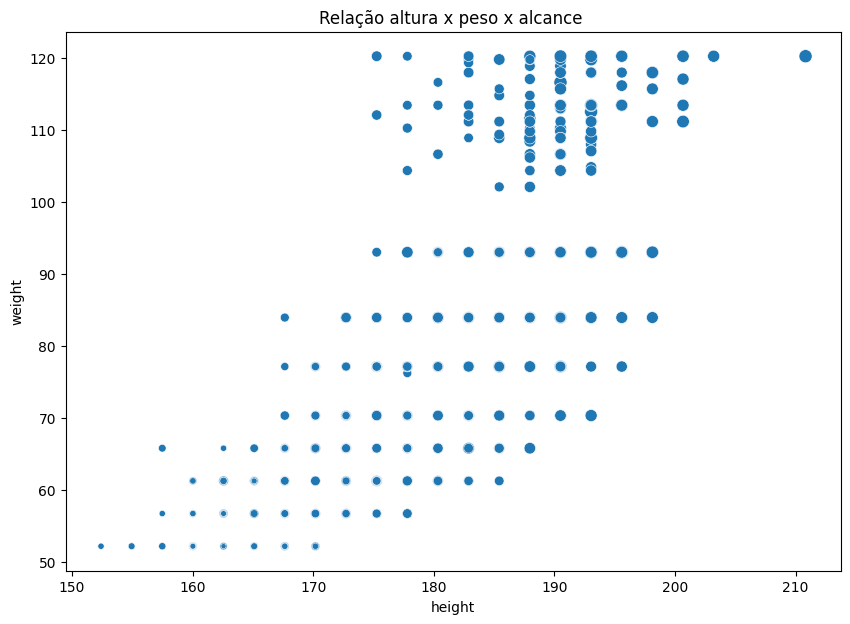

In [54]:
# Plotando gráfico
fig = plt.figure(figsize=(10, 7))

sns.scatterplot(x="height", y="weight", s=reach_estimator["reach_size"]*2, data=reach_estimator)

plt.title("Relação altura x peso x alcance ")

plt.show()

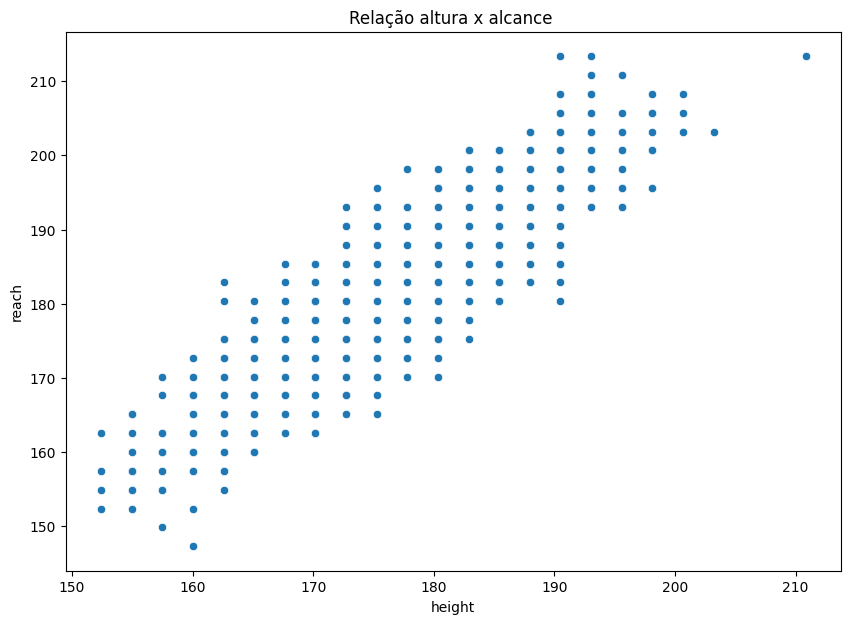

In [55]:
# Plotando gráfico
fig = plt.figure(figsize=(10, 7))

sns.scatterplot(x="height", y="reach", data=reach_estimator)

plt.title("Relação altura x alcance ")

plt.show()

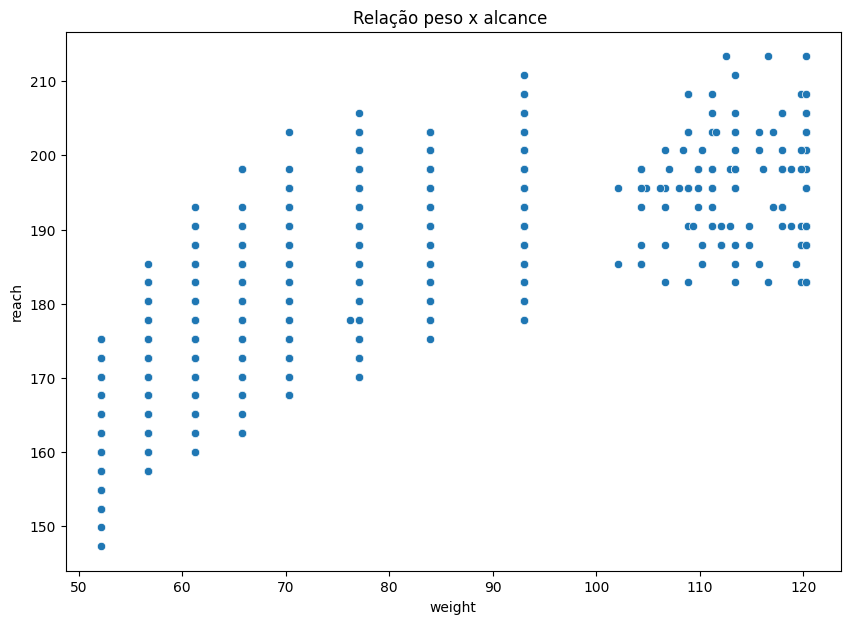

In [56]:
# Plotando gráfico
fig = plt.figure(figsize=(10, 7))

sns.scatterplot(x="weight", y="reach", data=reach_estimator)

plt.title("Relação peso x alcance ")

plt.show()

Inicialmente, observa-se uma correlação linear positiva entre o peso, altura e alcance dos lutadores. Por isso, para os lutadores com alcance não especificado, utilizaremos um modelo básico de regressão para estimar esses valores.

In [57]:
# Ajustando preditoras
X = reach_estimator[["height", "weight"]]
y = reach_estimator["reach"]

# Dividindo o conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# Realizando a modelagem
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Realizando predições e avaliando performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

Erro Quadrático Médio (MSE): 22.49


In [60]:
# Calculando o R^2
r2_score = model.score(X_test, y_test)
print(f"R^2: {r2_score:.2f}")

R^2: 0.78


In [61]:
# Coeficientes de regresão
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [0.896062   0.11243254]
Intercepto: 14.667665275276107


Agora que temos a modelagem pronta, podemos predizer os valores nulos.

A equação linear que descreve os dados é:

$$\hat{r} = 14.6677 + 0.8960*h + 0.1124*w$$

no qual:

- $\hat{r}$ - estimativa do reach(alcance)
- $h$ - altura do lutador
- $w$ - peso do lutador

In [62]:
# Realizando predições para o lutador 1
df_abordagem1.loc[df_abordagem1["reach1"].isna(), "reach1"] = model.intercept_ + model.coef_[0] * df_abordagem1["height1"] + model.coef_[1] * df_abordagem1["weight1"]

# Realizando predições para o lutador 2
df_abordagem1.loc[df_abordagem1["reach2"].isna(), "reach2"] = model.intercept_ + model.coef_[0] * df_abordagem1["height2"] + model.coef_[1] * df_abordagem1["weight2"]

# Conferindo quantidades de reachs zerados
# Lutador 1
print("Lutadores 1 com reach null")
print(df_abordagem1[df_abordagem1['reach1'].isna()].shape[0])

# Lutador 2
print("Lutadores 2 com reach null")
print(df_abordagem1[df_abordagem1['reach2'].isna()].shape[0])

Lutadores 1 com reach null
0
Lutadores 2 com reach null
0


#### **Histórico de wins, loses e draws**

O principal desafio ao computar as vitórias, derrotas e empates de cada lutador reside na questão temporal. Analiticamente falando, não podemos levar em conta vitórias que ainda não ocorreram ao treinar o modelo com base em lutas passadas. Por exemplo, mesmo sabendo que Anderson Silva acumulou muitas vitórias e se destacou como campeão, não podemos considerar esse registro de sucessos em sua primeira luta, uma vez que este sucesso ainda não havia ocorrido.

Primeiramente iremos cálcular o histórico de lutas com base nos eventos disponiveis nesta base de dados.

In [63]:
# Adicionando a data 
df_abordagem1 = df_abordagem1.merge(df_events[["event_id", "date"]], on="event_id", how="left")

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,date
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,2023-09-16
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,2023-09-16
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,2023-09-16
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,2023-09-16
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2023-09-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,1994-03-11
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,1994-03-11
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,1994-03-11
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,1994-03-11


In [64]:
# Computando vitórias, derrotas, empates e no contests

def hist_cont(df):
    """
        Função que cria o dataframe com o historico de vitórias de cada lutador
    """

    # Criando dataframe copia do original 
    df_function = df.copy()

    # Criando lista com todos os lutadores
    fighters1_list = df_function["fighters1_id"].drop_duplicates().to_list()
    fighters2_list = df_function["fighters2_id"].drop_duplicates().to_list()
    fighters_list = fighters2_list

    for id in fighters1_list:
        if id not in fighters2_list:
            fighters_list.append(id)

    # Criando dataframe com o historico de luta em ordem cronologica
    df_fight_history = pd.DataFrame()

    # Loop de iteração de cada lutador
    for id in fighters_list:
        # Dataframe de processamento
        df_process = df_function.loc[(df_function["fighters1_id"] == id) | (df_function["fighters2_id"] == id), ["fighters1_id", "fighters2_id", "w/l", "date", "event_id"]]

        # Criando coluna do lutador que esta sendo computado
        df_process["fighter_id"] = id

        # Ordenando de maneira cronologica
        df_process = df_process.sort_values("date")

        # Criando colunas flag
        df_process["win_flag"] = df_process.apply(lambda x: 1 if (x["w/l"] == "win") & (x["fighters1_id"] == x["fighter_id"]) else 0, axis=1)
        df_process["lose_flag"] = df_process.apply(lambda x: 1 if (x["w/l"] == "win") & (x["fighters1_id"] != x["fighter_id"]) else 0, axis=1)
        df_process["draw_flag"] = df_process.apply(lambda x: 1 if x["w/l"] == "draw" else 0, axis=1)
        df_process["nc_flag"] = df_process.apply(lambda x: 1 if x["w/l"] == "nc" else 0, axis=1)

        # Criando historico cumulativo
        df_process["wins"] = df_process["win_flag"].shift(1).cumsum().fillna(0)
        df_process["losses"] = df_process["lose_flag"].shift(1).cumsum().fillna(0)
        df_process["draws"] = df_process["draw_flag"].shift(1).cumsum().fillna(0)
        df_process["ncs"] = df_process["nc_flag"].shift(1).cumsum().fillna(0)

        # Criando coluna de tempo de inatividade
        df_process["date"] = pd.to_datetime(df_process["date"])
        df_process["day_wout_fights"] = df_process["date"].shift(1) - df_process["date"]
        df_process["day_wout_fights"] = df_process["day_wout_fights"].dt.days
        df_process["day_wout_fights"] = -1*df_process["day_wout_fights"]    


        # Removendo coluna de flags
        df_process = df_process.drop(columns=["win_flag", "lose_flag", "draw_flag", "nc_flag"])

        # Realizando junção no dataframe final
        df_fight_history = pd.concat([df_fight_history, df_process], ignore_index=True)


    return df_fight_history


df_fight_history = hist_cont(df_abordagem1)

df_fight_history

,fighters1_id,fighters2_id,w/l,date,event_id,fighter_id,wins,losses,draws,ncs,day_wout_fights
0,FIG0827,FIG1298,win,2015-12-19,EVE0343,FIG0827,0.0,0.0,0.0,0.0,NaN
1,FIG0716,FIG0827,win,2016-03-05,EVE0350,FIG0827,1.0,0.0,0.0,0.0,77.0
2,FIG0827,FIG1202,win,2016-07-23,EVE0364,FIG0827,1.0,1.0,0.0,0.0,140.0
3,FIG0827,FIG1813,win,2017-01-28,EVE0386,FIG0827,2.0,1.0,0.0,0.0,189.0
4,FIG0716,FIG0827,win,2017-09-09,EVE0409,FIG0827,3.0,1.0,0.0,0.0,224.0
...,...,...,...,...,...,...,...,...,...,...,...
14675,FIG3900,FIG4009,win,1995-09-08,EVE0006,FIG3900,0.0,0.0,0.0,0.0,NaN
14676,FIG3514,FIG3753,win,1995-07-14,EVE0005,FIG3514,0.0,0.0,0.0,0.0,NaN
14677,FIG3514,FIG2547,win,1995-09-08,EVE0006,FIG3514,1.0,0.0,0.0,0.0,56.0
14678,FIG3959,FIG4045,win,1995-04-07,EVE0004,FIG3959,0.0,0.0,0.0,0.0,NaN


A variável que criamos, denominada "days_wout_fights", indica quanto tempo o lutador esteve inativo até aquele combate específico. Faremos uma pequena alteração nela: as estreias, atualmente marcadas como Nan, passarão a ser consideradas como zero.

In [65]:
# Atribuido zero para os valores nan
df_fight_history.loc[df_fight_history["day_wout_fights"].isna(), "day_wout_fights"] = 0

In [66]:
# Verificando mundanças
df_fight_history[df_fight_history["day_wout_fights"].isna()]

,fighters1_id,fighters2_id,w/l,date,event_id,fighter_id,wins,losses,draws,ncs,day_wout_fights


Agora que temos o dataframe com o historico de cada lutador, podemos realizar um merge com o df_abordagem1 e computar estes dados no dataframe final da modelagem.

In [67]:
# Criando chave de lutador e evento

# Para o df_fight_history
df_fight_history["full_key"] = df_fight_history["fighter_id"] + df_fight_history["event_id"]

# PAra o df_abordagem
# Lutador 1
df_abordagem1["full_key1"] = df_abordagem1["fighters1_id"] + df_abordagem1["event_id"]

# Lutador 2
df_abordagem1["full_key2"] = df_abordagem1["fighters2_id"] + df_abordagem1["event_id"]

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,date,full_key1,full_key2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,2023-09-16,FIG1586EVE0663,FIG0827EVE0663
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,2023-09-16,FIG1911EVE0663,FIG0408EVE0663
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,2023-09-16,FIG3312EVE0663,FIG1830EVE0663
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,2023-09-16,FIG2320EVE0663,FIG0614EVE0663
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2023-09-16,FIG1431EVE0663,FIG1609EVE0663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,1994-03-11,FIG3607EVE0001,FIG4000EVE0001
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,1994-03-11,FIG4059EVE0001,FIG4006EVE0001
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,1994-03-11,FIG3858EVE0001,FIG3850EVE0001
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,1994-03-11,FIG0308EVE0001,FIG4021EVE0001


Com as chaves criadas, podemos prosseguir com o merge.

In [68]:
# Para o lutador 1
df_abordagem1 = df_abordagem1.merge(df_fight_history[["full_key", "wins", "losses", "draws", "ncs", "day_wout_fights"]], right_on="full_key", left_on="full_key1", how="left")
# Criando coluna de total fights
df_abordagem1["total_fights"] = df_abordagem1["wins"] + df_abordagem1["losses"] + df_abordagem1["draws"] + df_abordagem1["ncs"]
## Lista de index que deverão ser dropados
drop_index_list = df_abordagem1[(df_abordagem1["total_fights"] != 0) & (df_abordagem1["day_wout_fights"] == 0)].index.to_list()
# Realizando correção
df_abordagem1 = df_abordagem1.drop(drop_index_list)
# Renomeando as colunas
df_abordagem1 = df_abordagem1.rename(columns={"wins":"wins1", "losses": "losses1", "draws": "draws1", "ncs":"ncs1", "day_wout_fights": "day_wout_fights1"})
# Retirando colunas auxiliares
df_abordagem1 = df_abordagem1.drop(columns=["full_key1", "full_key", "total_fights"])

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,date,full_key2,wins1,losses1,draws1,ncs1,day_wout_fights1
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,2023-09-16,FIG0827EVE0663,8.0,3.0,0.0,0.0,196.0
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,2023-09-16,FIG0408EVE0663,5.0,0.0,0.0,0.0,63.0
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,2023-09-16,FIG1830EVE0663,1.0,1.0,0.0,0.0,161.0
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,2023-09-16,FIG0614EVE0663,1.0,1.0,0.0,0.0,154.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2023-09-16,FIG1609EVE0663,2.0,4.0,1.0,0.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7497,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,1994-03-11,FIG4000EVE0001,0.0,0.0,0.0,0.0,0.0
7499,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,1994-03-11,FIG4006EVE0001,0.0,0.0,0.0,0.0,0.0
7500,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,1994-03-11,FIG3850EVE0001,0.0,0.0,0.0,0.0,0.0
7503,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,1994-03-11,FIG4021EVE0001,0.0,0.0,0.0,0.0,0.0


In [69]:
# Para o lutador 1
df_abordagem1 = df_abordagem1.merge(df_fight_history[["full_key", "wins", "losses", "draws", "ncs", "day_wout_fights"]], right_on="full_key", left_on="full_key2", how="left")
# Criando coluna de total fights
df_abordagem1["total_fights"] = df_abordagem1["wins"] + df_abordagem1["losses"] + df_abordagem1["draws"] + df_abordagem1["ncs"]
## Lista de index que deverão ser dropados
drop_index_list = df_abordagem1[(df_abordagem1["total_fights"] != 0) & (df_abordagem1["day_wout_fights"] == 0)].index.to_list()
# Realizando correção
df_abordagem1 = df_abordagem1.drop(drop_index_list)
# Renomeando as colunas
df_abordagem1 = df_abordagem1.rename(columns={"wins":"wins2", "losses": "losses2", "draws": "draws2", "ncs":"ncs2", "day_wout_fights": "day_wout_fights2"})
# Retirando colunas auxiliares
df_abordagem1 = df_abordagem1.drop(columns=["full_key2", "full_key", "total_fights"])

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,date,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,2023-09-16,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,2023-09-16,5.0,0.0,0.0,0.0,63.0,12.0,6.0,0.0,1.0,49.0
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,2023-09-16,1.0,1.0,0.0,0.0,161.0,0.0,1.0,0.0,0.0,70.0
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,2023-09-16,1.0,1.0,0.0,0.0,154.0,6.0,6.0,0.0,0.0,147.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2023-09-16,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,1994-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7393,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,1994-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7394,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,1994-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7395,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,1994-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Ultimo tratamento é retirar a coluna date
df_abordagem1 = df_abordagem1.drop(columns=["date"])

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,5.0,0.0,0.0,0.0,63.0,12.0,6.0,0.0,1.0,49.0
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,1.0,1.0,0.0,0.0,161.0,0.0,1.0,0.0,0.0,70.0
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,1.0,1.0,0.0,0.0,154.0,6.0,6.0,0.0,0.0,147.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7393,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7394,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7395,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Features do df_fights**

A principal intenção nesta fase do projeto é calcular as médias de knockdowns (kd), strikes (str), takedowns (td) e submissions (sub) para cada lutador, considerando um aspecto temporal. Isso significa que as médias serão atualizadas à medida que novas lutas acontecerem, garantindo que informações de eventos futuros não influenciem na modelagem atual.


Primeiramente será criado um dataframe auxiliar do df_fights().

In [71]:
# Criando dataframe auxiliar
df_fights_aux = df_fights.copy()

df_fights_aux

,event_id,weight_class,w/l,fighter1,fighter2,kd_fighter1,kd_fighter2,str_fighter1,str_fighter2,td_fighter1,td_fighter2,sub_fighter1,sub_fighter2,method,round,time,fight_id
0,EVE0663,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,1,0,84,80,1,4,1,1,S-DEC,5,5:00,F066301
1,EVE0663,Welterweight,win,Jack Della Maddalena,Kevin Holland,0,0,105,127,0,0,0,0,S-DEC,3,5:00,F066302
2,EVE0663,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,1,0,18,6,0,0,0,0,KO/TKO_Punches,1,0:54,F066303
3,EVE0663,Lightweight,win,Daniel Zellhuber,Christos Giagos,0,0,36,38,0,0,1,0,SUB_Anaconda_Choke,2,3:26,F066304
4,EVE0663,Featherweight,win,Kyle Nelson,Fernando Padilla,0,0,82,72,0,0,0,0,U-DEC,3,5:00,F066305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,Open Weight,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,KO/TKO,1,2:50,F000111
7336,EVE0001,Open Weight,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,SUB_Keylock,1,4:52,F000112
7337,EVE0001,Open Weight,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,KO/TKO_Punches,1,12:13,F000113
7338,EVE0001,Open Weight,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,SUB_Guillotine_Choke,1,0:58,F000114


In [72]:
# Realizando merge pelo fight_id
df_fights_aux = df_fights_aux.merge(df_abordagem1[["fight_id", "fighters1_id", "fighters2_id"]], on="fight_id", how="left")

df_fights_aux

,event_id,weight_class,w/l,fighter1,fighter2,kd_fighter1,kd_fighter2,str_fighter1,str_fighter2,td_fighter1,td_fighter2,sub_fighter1,sub_fighter2,method,round,time,fight_id,fighters1_id,fighters2_id
0,EVE0663,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,1,0,84,80,1,4,1,1,S-DEC,5,5:00,F066301,FIG1586,FIG0827
1,EVE0663,Welterweight,win,Jack Della Maddalena,Kevin Holland,0,0,105,127,0,0,0,0,S-DEC,3,5:00,F066302,FIG1911,FIG0408
2,EVE0663,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,1,0,18,6,0,0,0,0,KO/TKO_Punches,1,0:54,F066303,FIG3312,FIG1830
3,EVE0663,Lightweight,win,Daniel Zellhuber,Christos Giagos,0,0,36,38,0,0,1,0,SUB_Anaconda_Choke,2,3:26,F066304,FIG2320,FIG0614
4,EVE0663,Featherweight,win,Kyle Nelson,Fernando Padilla,0,0,82,72,0,0,0,0,U-DEC,3,5:00,F066305,FIG1431,FIG1609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,Open Weight,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,KO/TKO,1,2:50,F000111,FIG3607,FIG4000
7336,EVE0001,Open Weight,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,SUB_Keylock,1,4:52,F000112,FIG4059,FIG4006
7337,EVE0001,Open Weight,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,KO/TKO_Punches,1,12:13,F000113,FIG3858,FIG3850
7338,EVE0001,Open Weight,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,SUB_Guillotine_Choke,1,0:58,F000114,FIG0308,FIG4021


Outra informação importante para o cálculo do histórico das estatisticas de luda de cada lutador é a data, que será obtida da tabela df_events.

In [73]:
# Merge com a tabela df_event
df_fights_aux = df_fights_aux.merge(df_events[["event_id", "date"]], on="event_id", how="left")

df_fights_aux

,event_id,weight_class,w/l,fighter1,fighter2,kd_fighter1,kd_fighter2,str_fighter1,str_fighter2,td_fighter1,td_fighter2,sub_fighter1,sub_fighter2,method,round,time,fight_id,fighters1_id,fighters2_id,date
0,EVE0663,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,1,0,84,80,1,4,1,1,S-DEC,5,5:00,F066301,FIG1586,FIG0827,2023-09-16
1,EVE0663,Welterweight,win,Jack Della Maddalena,Kevin Holland,0,0,105,127,0,0,0,0,S-DEC,3,5:00,F066302,FIG1911,FIG0408,2023-09-16
2,EVE0663,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,1,0,18,6,0,0,0,0,KO/TKO_Punches,1,0:54,F066303,FIG3312,FIG1830,2023-09-16
3,EVE0663,Lightweight,win,Daniel Zellhuber,Christos Giagos,0,0,36,38,0,0,1,0,SUB_Anaconda_Choke,2,3:26,F066304,FIG2320,FIG0614,2023-09-16
4,EVE0663,Featherweight,win,Kyle Nelson,Fernando Padilla,0,0,82,72,0,0,0,0,U-DEC,3,5:00,F066305,FIG1431,FIG1609,2023-09-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,Open Weight,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,KO/TKO,1,2:50,F000111,FIG3607,FIG4000,1994-03-11
7336,EVE0001,Open Weight,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,SUB_Keylock,1,4:52,F000112,FIG4059,FIG4006,1994-03-11
7337,EVE0001,Open Weight,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,KO/TKO_Punches,1,12:13,F000113,FIG3858,FIG3850,1994-03-11
7338,EVE0001,Open Weight,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,SUB_Guillotine_Choke,1,0:58,F000114,FIG0308,FIG4021,1994-03-11


Antes de proceguir com a criação desta nova métrica, será necessario tratar alguns valores neste dataframe auxliar. Ao invés de possuir valores nulos ou iguais a zero, as colunas das estatisticas de luta possuem a string "--" computada, o que irá causar problemas na hora de cálcular as médias.

In [74]:
# Realizando ajuste
# Para o lutador 1 
df_fights_aux.loc[(df_fights_aux["kd_fighter1"] == "--") | (df_fights_aux["str_fighter1"] == "--") | (df_fights_aux["td_fighter1"] == "--") | (df_fights_aux["sub_fighter1"] == "--"), ["kd_fighter1", "str_fighter1", "td_fighter1", "sub_fighter1"]] = 0

# Para o lutador 
df_fights_aux.loc[(df_fights_aux["kd_fighter2"] == "--") | (df_fights_aux["str_fighter2"] == "--") | (df_fights_aux["td_fighter2"] == "--") | (df_fights_aux["sub_fighter2"] == "--"), ["kd_fighter2", "str_fighter2", "td_fighter2", "sub_fighter2"]] = 0

Para processar esses dados, criaremos um dataframe denominado "df_stats_hist", que conterá o histórico estatístico de combate de cada lutador.

In [75]:
# Criando função

def fight_stats_hist(df):
    """
        Função que cria um dataframe com o histórico de estatistica de luta para cada lutador.
    """

    # Criando cópia do dataframe original
    df_function = df.copy()

    # Criando lista com todos os lutadores
    fighters1_list = df_function["fighters1_id"].drop_duplicates().to_list()
    fighters2_list = df_function["fighters2_id"].drop_duplicates().to_list()
    fighters_list = fighters2_list
    
    for id in fighters1_list:
        if id not in fighters2_list:
            fighters_list.append(id)


    # Criando dataframe final que será retornado
    df_stats_hist = pd.DataFrame()

    for id in fighters_list:
        # df_process para quando o lutador for 1
        df_process1 = df_function.loc[df_function["fighters1_id"] == id, ["fight_id","date","fighters1_id","kd_fighter1", "str_fighter1", "td_fighter1", "sub_fighter1"]]
        # df_process para quando o lutador for 2
        df_process2 = df_function.loc[df_function["fighters2_id"] == id, ["fight_id","date","fighters2_id","kd_fighter2", "str_fighter2", "td_fighter2", "sub_fighter2"]]

        # Renomeando as colunas para poder concatenar os dataframes
        df_process1 = df_process1.rename(columns={"fighters1_id":"fighters_id","kd_fighter1":"kd_fighter", "str_fighter1":"str_fighter", "td_fighter1":"td_fighter", "sub_fighter1":"sub_fighter"})
        df_process2 = df_process2.rename(columns={"fighters2_id":"fighters_id","kd_fighter2":"kd_fighter", "str_fighter2": "str_fighter", "td_fighter2":"td_fighter", "sub_fighter2":"sub_fighter"})

        # Realizado o union
        df_process = pd.concat([df_process1, df_process2], ignore_index=True)

        # Ordenar pela data
        df_process = df_process.sort_values("date")

        # Ajustando formato dos dados
        df_process["kd_fighter"] = df_process["kd_fighter"].astype("int64")
        df_process["str_fighter"] = df_process["str_fighter"].astype("int64")
        df_process["td_fighter"] = df_process["td_fighter"].astype("int64")
        df_process["sub_fighter"] = df_process["sub_fighter"].astype("int64")

        # Resetando o index
        df_process = df_process.reset_index(drop=True)

        # Realizando cálculos
        df_process["count"] = df_process.index
        df_process["kd_mean"] = df_process["kd_fighter"].shift(1).cumsum()/df_process["count"]
        df_process["str_mean"] = df_process["str_fighter"].shift(1).cumsum()/df_process["count"]
        df_process["td_mean"] = df_process["td_fighter"].shift(1).cumsum()/df_process["count"]
        df_process["sub_mean"] = df_process["sub_fighter"].shift(1).cumsum()/df_process["count"]

        # Preenchendo valores zerados
        df_process["kd_mean"] = df_process["kd_mean"].fillna(0)
        df_process["str_mean"] = df_process["str_mean"].fillna(0)
        df_process["td_mean"] = df_process["td_mean"].fillna(0)
        df_process["sub_mean"] = df_process["sub_mean"].fillna(0)

        # Concatenando com o dataframe final
        df_stats_hist = pd.concat([df_stats_hist, df_process], ignore_index=True)

    
    return df_stats_hist

In [76]:
# Executando função e criando dataframe
df_stats_hist = fight_stats_hist(df_fights_aux)

df_stats_hist

,fight_id,date,fighters_id,kd_fighter,str_fighter,td_fighter,sub_fighter,count,kd_mean,str_mean,td_mean,sub_mean
0,F034307,2015-12-19,FIG0827,0,32,4,0,0,0.0,0.0,0.000000,0.00
1,F035005,2016-03-05,FIG0827,0,28,1,0,1,0.0,32.0,4.000000,0.00
2,F036401,2016-07-23,FIG0827,0,87,3,0,2,0.0,30.0,2.500000,0.00
3,F038601,2017-01-28,FIG0827,0,13,2,1,3,0.0,49.0,2.666667,0.00
4,F040901,2017-09-09,FIG0827,0,72,0,0,4,0.0,40.0,2.500000,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
14675,F000610,1995-09-08,FIG3900,0,0,0,0,0,0.0,0.0,0.000000,0.00
14676,F000510,1995-07-14,FIG3514,0,0,0,0,0,0.0,0.0,0.000000,0.00
14677,F000611,1995-09-08,FIG3514,0,0,0,0,1,0.0,0.0,0.000000,0.00
14678,F000408,1995-04-07,FIG3959,0,17,0,0,0,0.0,0.0,0.000000,0.00


Agora que temos o dataframe com o historico de luta de cada lutador, podemos realizar a junção com o df_abordagem1.

In [77]:
# Realizando merge para os lutadores 1
# Criando chave temporaria
df_stats_hist["merge_key"] = df_stats_hist["fight_id"] + df_stats_hist["fighters_id"]
df_abordagem1["merge_key1"] = df_abordagem1["fight_id"] + df_abordagem1["fighters1_id"]
df_abordagem1["merge_key2"] = df_abordagem1["fight_id"] + df_abordagem1["fighters2_id"]

# Realizando o merge para lutador 1
df_abordagem1 = df_abordagem1.merge(df_stats_hist[["merge_key", "kd_mean", "str_mean", "td_mean", "sub_mean"]], right_on="merge_key", left_on="merge_key1")
df_abordagem1 = df_abordagem1.rename(columns={"kd_mean": "kd_mean1", "str_mean":"str_mean1", "td_mean":"td_mean1", "sub_mean":"sub_mean1"})
df_abordagem1 = df_abordagem1.drop(columns=["merge_key"])

# Realizando merge para lutador 2
df_abordagem1 = df_abordagem1.merge(df_stats_hist[["merge_key", "kd_mean", "str_mean", "td_mean", "sub_mean"]], right_on="merge_key", left_on="merge_key2")
df_abordagem1 = df_abordagem1.rename(columns={"kd_mean": "kd_mean2", "str_mean":"str_mean2", "td_mean":"td_mean2", "sub_mean":"sub_mean2"})
df_abordagem1 = df_abordagem1.drop(columns=["merge_key"])

# Retirando colunas temporarias
df_abordagem1 = df_abordagem1.drop(columns=["merge_key1", "merge_key2"])
df_stats_hist = df_stats_hist.drop(columns=["merge_key"])

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0,0.0,69.272727,0.363636,0.545455,0.066667,57.466667,3.000000,0.400000
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,5.0,0.0,0.0,0.0,63.0,12.0,6.0,0.0,1.0,49.0,1.0,38.200000,0.200000,0.200000,0.263158,42.631579,0.631579,0.421053
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,1.0,1.0,0.0,0.0,161.0,0.0,1.0,0.0,0.0,70.0,0.0,2.500000,2.500000,1.500000,0.000000,3.000000,1.000000,0.000000
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,1.0,1.0,0.0,0.0,154.0,6.0,6.0,0.0,0.0,147.0,0.5,65.000000,0.000000,0.000000,0.083333,24.833333,1.833333,0.250000
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0,0.0,33.428571,1.000000,0.571429,1.000000,20.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000


Assim temos o histórico de knockdowsn, strikes, takedowns e submissions que cada lutador tinha antes da luta começar.

#### **Variavel Resposta**

Antes de avançarmos na modelagem do problema, precisamos fazer um ajuste final no "df_abordagem1". No formato atual, o "lutador 1" é sempre apresentado como o vencedor da luta. No entanto, para a modelagem, a variável resposta deverá assumir três possíveis valores: 1 se o "lutador 1" vencer, 2 se o "lutador 2" vencer, 3 em caso de empate ou no contest.

In [78]:
# Verificando proporções
df_abordagem1["w/l"].value_counts()

win     7207
nc        77
draw      56
Name: w/l, dtype: int64

In [79]:
# Criando variavel resposta
df_abordagem1.loc[(df_abordagem1["w/l"] == "draw") | (df_abordagem1["w/l"] == "nc"), "resposta"] = 3

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2,resposta
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0,0.0,69.272727,0.363636,0.545455,0.066667,57.466667,3.000000,0.400000,3.0
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,5.0,0.0,0.0,0.0,63.0,12.0,6.0,0.0,1.0,49.0,1.0,38.200000,0.200000,0.200000,0.263158,42.631579,0.631579,0.421053,NaN
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,1.0,1.0,0.0,0.0,161.0,0.0,1.0,0.0,0.0,70.0,0.0,2.500000,2.500000,1.500000,0.000000,3.000000,1.000000,0.000000,NaN
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,1.0,1.0,0.0,0.0,154.0,6.0,6.0,0.0,0.0,147.0,0.5,65.000000,0.000000,0.000000,0.083333,24.833333,1.833333,0.250000,NaN
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0,0.0,33.428571,1.000000,0.571429,1.000000,20.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN


In [80]:
# Obtendo index das lutas que tiveram vencedor
random_index = df_abordagem1[df_abordagem1["resposta"] != 3].index.to_list()

# selecionando 50% da amostra
np.random.seed(64)
n = int(len(random_index) * 0.5)
fighters_2_list = sample(random_index, n)

# Criando variavel resposta
df_abordagem1.loc[df_abordagem1.index.isin(fighters_2_list), "resposta"] = 2

# Para o resto dos dados
df_abordagem1.loc[df_abordagem1["resposta"].isna(), "resposta"] = 1

df_abordagem1

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2,resposta
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0,0.0,69.272727,0.363636,0.545455,0.066667,57.466667,3.000000,0.400000,3.0
1,EVE0663,F066302,Welterweight,win,Jack Della Maddalena,Kevin Holland,FIG1911,FIG0408,Switch,Orthodox,180.34,190.50,77.111,77.111,185.420000,205.740000,5.0,0.0,0.0,0.0,63.0,12.0,6.0,0.0,1.0,49.0,1.0,38.200000,0.200000,0.200000,0.263158,42.631579,0.631579,0.421053,2.0
2,EVE0663,F066303,Bantamweight,win,Raul Rosas Jr.,Terrence Mitchell,FIG3312,FIG1830,Switch,Orthodox,175.26,177.80,61.235,61.235,170.180000,187.960000,1.0,1.0,0.0,0.0,161.0,0.0,1.0,0.0,0.0,70.0,0.0,2.500000,2.500000,1.500000,0.000000,3.000000,1.000000,0.000000,2.0
3,EVE0663,F066304,Lightweight,win,Daniel Zellhuber,Christos Giagos,FIG2320,FIG0614,Switch,Orthodox,185.42,177.80,70.307,70.307,195.580000,180.340000,1.0,1.0,0.0,0.0,154.0,6.0,6.0,0.0,0.0,147.0,0.5,65.000000,0.000000,0.000000,0.083333,24.833333,1.833333,0.250000,2.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0,0.0,33.428571,1.000000,0.571429,1.000000,20.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
7336,EVE0001,F000112,Open Weight,win,Frank Hamaker,Thaddeus Luster,FIG4059,FIG4006,Orthodox,Orthodox,185.42,190.50,92.986,95.254,191.270133,196.077125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
7338,EVE0001,F000114,Open Weight,win,Patrick Smith,Ray Wizard,FIG0308,FIG4021,Orthodox,Orthodox,187.96,182.88,102.058,104.326,194.566118,190.269120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,2.0


In [81]:
# Conferindo proporções
df_abordagem1["resposta"].value_counts()

1.0    3604
2.0    3603
3.0     133
Name: resposta, dtype: int64

Agora que temos computada a varivavel resposta, podemos criar o dataframe final com a correção dos lutadores 1 e 2.

In [82]:
# Criando dataframe final
df_abordagem1_final = df_abordagem1.copy()

# Lista de colunas

col_list = df_abordagem1_final.columns.to_list()

col_list = col_list[:-1]

for col in col_list:
    df_abordagem1_final[col] = np.nan

df_abordagem1_final

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2,resposta
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


Para as linhas com a variavel resposta igual a 1 e 3, podemos manter a mesma ordem do dataframe original.

In [83]:
# 
for col in col_list:
    df_abordagem1_final.loc[(df_abordagem1_final["resposta"] == 1) | (df_abordagem1_final["resposta"] == 3), col] = df_abordagem1[col]


df_abordagem1_final

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2,resposta
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0,0.0,69.272727,0.363636,0.545455,0.066667,57.466667,3.0,0.4,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0,0.0,33.428571,1.000000,0.571429,1.000000,20.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
7336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0
7338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


Para as linhas com a variavel resposta igual a 2, iremos inverter as colunas que correspondem aos lutadores.

In [84]:
# As colunas que não possuem dados dos lutadores podem ser mantidas iguais
normal_col = ["event_id", "fight_id", "weight_class", "w/l"]

for col in normal_col:
    df_abordagem1_final.loc[df_abordagem1_final["resposta"] == 2, col] = df_abordagem1[col]


df_abordagem1_final

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2,resposta
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0,0.0,69.272727,0.363636,0.545455,0.066667,57.466667,3.0,0.4,3.0
1,EVE0663,F066302,Welterweight,win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,EVE0663,F066303,Bantamweight,win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,EVE0663,F066304,Lightweight,win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0,0.0,33.428571,1.000000,0.571429,1.000000,20.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
7336,EVE0001,F000112,Open Weight,win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0
7338,EVE0001,F000114,Open Weight,win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [85]:
# Invertendo os lutadores
fighter1_cols = ["fighter1", "fighters1_id", "stance1", "height1", "weight1", "reach1", "wins1", "losses1", "draws1", "ncs1", "day_wout_fights1", "kd_mean1", "str_mean1", "td_mean1", "sub_mean1"]

for col in fighter1_cols:
    df_abordagem1_final.loc[df_abordagem1_final["resposta"] == 2, col.replace("1", "2")] = df_abordagem1[col]

df_abordagem1_final

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2,resposta
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0,0.0,69.272727,0.363636,0.545455,0.066667,57.466667,3.0,0.4,3.0
1,EVE0663,F066302,Welterweight,win,NaN,Jack Della Maddalena,NaN,FIG1911,NaN,Switch,NaN,180.34,NaN,77.111,NaN,185.420000,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,63.0,NaN,NaN,NaN,NaN,1.000000,38.200000,0.2,0.2,2.0
2,EVE0663,F066303,Bantamweight,win,NaN,Raul Rosas Jr.,NaN,FIG3312,NaN,Switch,NaN,175.26,NaN,61.235,NaN,170.180000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,161.0,NaN,NaN,NaN,NaN,0.000000,2.500000,2.5,1.5,2.0
3,EVE0663,F066304,Lightweight,win,NaN,Daniel Zellhuber,NaN,FIG2320,NaN,Switch,NaN,185.42,NaN,70.307,NaN,195.580000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,154.0,NaN,NaN,NaN,NaN,0.500000,65.000000,0.0,0.0,2.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0,0.0,33.428571,1.000000,0.571429,1.000000,20.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
7336,EVE0001,F000112,Open Weight,win,NaN,Frank Hamaker,NaN,FIG4059,NaN,Orthodox,NaN,185.42,NaN,92.986,NaN,191.270133,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,2.0
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0
7338,EVE0001,F000114,Open Weight,win,NaN,Patrick Smith,NaN,FIG0308,NaN,Orthodox,NaN,187.96,NaN,102.058,NaN,194.566118,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,9.000000,0.0,0.5,2.0


In [86]:
# Para os lutadores 1
for col in fighter1_cols:
    df_abordagem1_final.loc[df_abordagem1_final["resposta"] == 2, col] = df_abordagem1[col.replace("1", "2")]


df_abordagem1_final

,event_id,fight_id,weight_class,w/l,fighter1,fighter2,fighters1_id,fighters2_id,stance1,stance2,height1,height2,weight1,weight2,reach1,reach2,wins1,losses1,draws1,ncs1,day_wout_fights1,wins2,losses2,draws2,ncs2,day_wout_fights2,kd_mean1,str_mean1,td_mean1,sub_mean1,kd_mean2,str_mean2,td_mean2,sub_mean2,resposta
0,EVE0663,F066301,Women's Flyweight,draw,Alexa Grasso,Valentina Shevchenko,FIG1586,FIG0827,Orthodox,Southpaw,165.10,165.10,56.699,56.699,167.640000,167.640000,8.0,3.0,0.0,0.0,196.0,12.0,3.0,0.0,0.0,196.0,0.000000,69.272727,0.363636,0.545455,0.066667,57.466667,3.0,0.4,3.0
1,EVE0663,F066302,Welterweight,win,Kevin Holland,Jack Della Maddalena,FIG0408,FIG1911,Orthodox,Switch,190.50,180.34,77.111,77.111,205.740000,185.420000,12.0,6.0,0.0,1.0,49.0,5.0,0.0,0.0,0.0,63.0,0.263158,42.631579,0.631579,0.421053,1.000000,38.200000,0.2,0.2,2.0
2,EVE0663,F066303,Bantamweight,win,Terrence Mitchell,Raul Rosas Jr.,FIG1830,FIG3312,Orthodox,Switch,177.80,175.26,61.235,61.235,187.960000,170.180000,0.0,1.0,0.0,0.0,70.0,1.0,1.0,0.0,0.0,161.0,0.000000,3.000000,1.000000,0.000000,0.000000,2.500000,2.5,1.5,2.0
3,EVE0663,F066304,Lightweight,win,Christos Giagos,Daniel Zellhuber,FIG0614,FIG2320,Orthodox,Switch,177.80,185.42,70.307,70.307,180.340000,195.580000,6.0,6.0,0.0,0.0,147.0,1.0,1.0,0.0,0.0,154.0,0.083333,24.833333,1.833333,0.250000,0.500000,65.000000,0.0,0.0,2.0
4,EVE0663,F066305,Featherweight,win,Kyle Nelson,Fernando Padilla,FIG1431,FIG1609,Switch,Orthodox,180.34,185.42,65.771,65.771,180.340000,193.040000,2.0,4.0,1.0,0.0,98.0,1.0,0.0,0.0,0.0,140.0,0.000000,33.428571,1.000000,0.571429,1.000000,20.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,EVE0001,F000111,Open Weight,win,Orlando Wiet,Robert Lucarelli,FIG3607,FIG4000,Southpaw,Orthodox,177.80,187.96,77.111,111.130,182.657274,195.586106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
7336,EVE0001,F000112,Open Weight,win,Thaddeus Luster,Frank Hamaker,FIG4006,FIG4059,Orthodox,Orthodox,190.50,185.42,95.254,92.986,196.077125,191.270133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0
7337,EVE0001,F000113,Open Weight,win,Johnny Rhodes,David Levicki,FIG3858,FIG3850,Orthodox,Orthodox,182.88,195.58,95.254,124.738,189.249132,203.944081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0
7338,EVE0001,F000114,Open Weight,win,Ray Wizard,Patrick Smith,FIG4021,FIG0308,Orthodox,Orthodox,182.88,187.96,104.326,102.058,190.269120,194.566118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,0.5,2.0


Assim temos o dataframe final que será utilizado na modelagem

In [87]:
# Salvando arquivo em csv

df_abordagem1_final.to_csv("df_abordagem1_final.csv")